# Проект для «Викишоп» с BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучим модель классифицировать комментарии на позитивные и негативные. В нашем распоряжении набор данных с разметкой о токсичности правок.

Наша задача построить модель со значением метрики качества *F1* не меньше 0.75. 

**Разработка пройдёт в три основных этапа**

1. Загрузка и подготовка данных.
2. Подготовка признаков BERT
3. Обучение разных моделей. 

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-необходимых-библиотек" data-toc-modified-id="Загрузка-необходимых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка необходимых библиотек</a></span></li><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка признаков</a></span></li></ul></li><li><span><a href="#Подготовка-признаков-BERT" data-toc-modified-id="Подготовка-признаков-BERT-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка признаков BERT</a></span><ul class="toc-item"><li><span><a href="#Загрузка-предобученной-модели" data-toc-modified-id="Загрузка-предобученной-модели-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка предобученной модели</a></span></li><li><span><a href="#Создание-выборки,-дисбаланс-классов" data-toc-modified-id="Создание-выборки,-дисбаланс-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Создание выборки, дисбаланс классов</a></span></li><li><span><a href="#Токенизация-BERT" data-toc-modified-id="Токенизация-BERT-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Токенизация BERT</a></span></li><li><span><a href="#Создание-эмбеддингов-обучающей-выборки" data-toc-modified-id="Создание-эмбеддингов-обучающей-выборки-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Создание эмбеддингов обучающей выборки</a></span></li><li><span><a href="#Подготовка-тестовой-выборки" data-toc-modified-id="Подготовка-тестовой-выборки-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Подготовка тестовой выборки</a></span></li></ul></li><li><span><a href="#Обучение-моделей-с-BERT" data-toc-modified-id="Обучение-моделей-с-BERT-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей с BERT</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LGBMClassifier</a></span></li></ul></li><li><span><a href="#Подготовка-признаков-TF-IDF" data-toc-modified-id="Подготовка-признаков-TF-IDF-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка признаков TF-IDF</a></span></li><li><span><a href="#Обучение-моделей-с-TF-IDF" data-toc-modified-id="Обучение-моделей-с-TF-IDF-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение моделей с TF-IDF</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>LGBMClassifier</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Подготовка

### Загрузка необходимых библиотек

In [1]:
%%capture
!pip install torch

In [2]:
%%capture
!pip install transformers

In [3]:
%%capture
!pip install pactools

In [4]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from tqdm import notebook
import re
from pymystem3 import Mystem

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import torch
import transformers
import spacy

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from pactools.grid_search import GridSearchCVProgressBar

from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

random_seed = 32
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

import warnings
warnings.filterwarnings('ignore')
print('Setup complete')

C:\Users\virus\anaconda3\envs\praktikum_env_win_new\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
C:\Users\virus\anaconda3\envs\praktikum_env_win_new\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Setup complete


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\virus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Загрузка и изучение данных

In [5]:
try:
    df = pd.read_csv('/datasets/toxic_comments.csv')
except:
    df = pd.read_csv('datasets/toxic_comments.csv')

In [6]:
def get_info(df):
    display(df.head(), df.info(), df.describe().T)
    print('Процент пропусков:\n', df.isna().mean().sort_values(ascending=False)*100)
    print()
    print('Кол-во дубликатов:', df.duplicated().sum())

get_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
text     159571 non-null object
toxic    159571 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


None

,count,mean,std,min,25%,50%,75%,max
toxic,159571.0,0.101679,0.302226,0.0,0.0,0.0,0.0,1.0


Процент пропусков:
 toxic    0.0
text     0.0
dtype: float64

Кол-во дубликатов: 0


Дубликаты и пропуски не обнаружены, всего у нас имеется 159 571 строк.    
Посмотрим на баланс классов в целевом признаке.

0    143346
1     16225
Name: toxic, dtype: int64

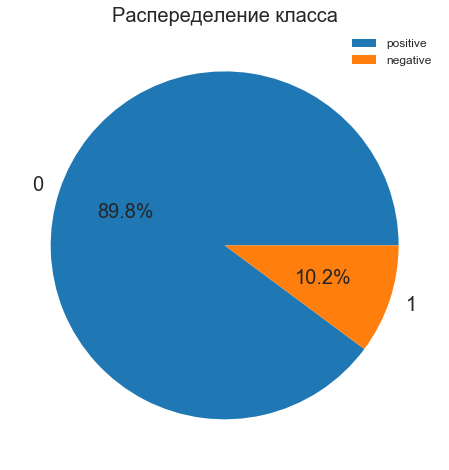

In [7]:
df['toxic'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', fontsize=20);
plt.legend(['positive', 'negative'], fontsize=12)
plt.title('Распеределение класса', fontsize=20)
plt.axis('off');
df['toxic'].value_counts()

Класс в целевом признаке имеет сильный дисбаланс. Всего 10,2% негативных комментария

### Подготовка признаков

Для начала приведём текст к нижнему регистру

In [8]:
df['text'] = df['text'].str.lower()
df.head()

,text,toxic
0,explanation\nwhy the edits made under my usern...,0
1,d'aww! he matches this background colour i'm s...,0
2,"hey man, i'm really not trying to edit war. it...",0
3,"""\nmore\ni can't make any real suggestions on ...",0
4,"you, sir, are my hero. any chance you remember...",0


Посмотрим на распределение длинн комментариев.

count    159571.000000
mean        394.073391
std         590.721053
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: lenght, dtype: float64

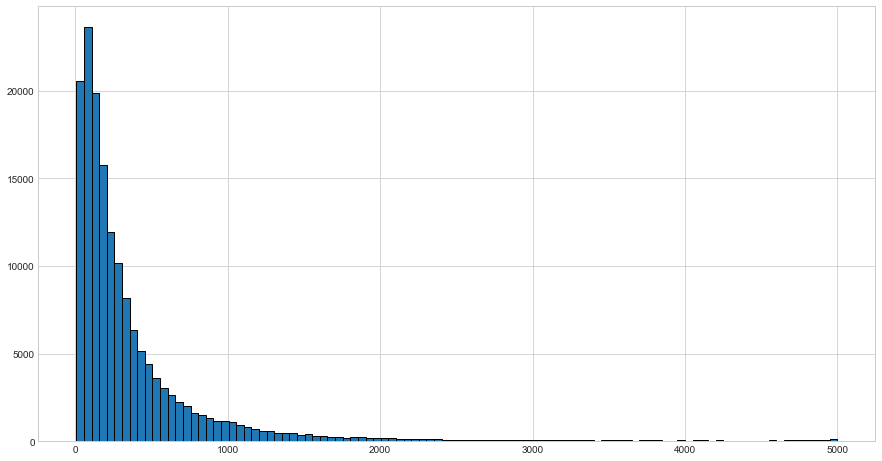

In [9]:
df['lenght'] = df['text'].apply(lambda x: len(x))
df['lenght'].hist(bins=100, figsize=(15,8), ec='black');
df['lenght'].describe()

У нас присутсвуют как и короткие комментарии в 6 символов (возможно одно слово) и очень длинные в 5000 символов (очень похоже на выбросы).

Обработаем текст: очистим его и лемматизируем пакетом `spaCy`

In [10]:
tqdm.pandas()

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
df['spacy_text'] = df['text'].progress_apply(lambda sentence:
                                            ' '.join([token.lemma_ for token in nlp(re.sub(r"[^a-zA-Z']",' ',sentence))]))

df.head()

100%|██████████| 159571/159571 [13:52<00:00, 191.63it/s]


,text,toxic,lenght,spacy_text
0,explanation\nwhy the edits made under my usern...,0,264,explanation why the edit make under my usernam...
1,d'aww! he matches this background colour i'm s...,0,112,d'aww he match this background colour I be s...
2,"hey man, i'm really not trying to edit war. it...",0,233,hey man I be really not try to edit war it...
3,"""\nmore\ni can't make any real suggestions on ...",0,622,more I can not make any real suggestion on ...
4,"you, sir, are my hero. any chance you remember...",0,67,you sir be my hero any chance you rememb...


Перейдём к обучению

## Подготовка признаков BERT

### Загрузка предобученной модели

Загрузим предобученную модель DistilBertModel

In [11]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (transformers.DistilBertModel, transformers.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Так как нам придется передавать на порядок меньше строк для обучения, уменьшим выборку по наименьшему классу.

### Создание выборки, дисбаланс классов

In [12]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_sample = features_zeros.sample(frac=0.1, random_state=42)
    target_sample = target_zeros.sample(frac=0.1, random_state=42)
    
    features_downsampled = pd.concat([features_sample] + [features_ones])
    target_downsampled = pd.concat([target_sample] + [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=42)
    target_downsampled = shuffle(target_downsampled, random_state=42)
    
    return features_downsampled, target_downsampled

Создадим выборки для BERT и уберем дисбаланс классов в выборке. Тестовую выборку трогать не будем

In [13]:
features = df['text']
target = df['toxic']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=32)

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

target_downsampled.value_counts(normalize=True).to_frame()

,toxic
1,0.532009
0,0.467991


Соберём таргет и признаки обучающей выборки после балансирования класса, удалим дубликаты и создадим образец с 2000 значениями.

In [14]:
df_bert = features_downsampled.to_frame().join(
    target_downsampled.to_frame())
df_bert.head()

,text,toxic
3730,"again, i have not attacked anyone. good night.",0
140837,"pork rinds also come to mind, as in frijoles c...",0
102748,and you are vandalizing mah page,1
152371,hi my name is dinesh and i am studying b-tech ...,0
44603,"no, i am not trying to mount a smear campaign ...",0


In [15]:
df_bert.duplicated().sum()

7

In [16]:
df_bert.drop_duplicates(inplace=True)
df_bert.duplicated().sum()

0

In [17]:
df_bert[df_bert.index == 9403]

,text,toxic
9403,(the surprise of fifa world cup 2014),0


Получили датасет из которого будем брать срезы, проверили один индекс, чтобы убедиться в правильности

In [18]:
df_samp = df_bert.sample(2000).reset_index(drop=True)
df_samp.head()

,text,toxic
0,category:opposed to immigration rates exceedin...,0
1,god is dead\ni don't mean to startle anyone bu...,1
2,if there are sources then you should add them ...,0
3,"""\ni believe the original link was lost during...",0
4,laughingstock pc redirection \n\ncover the eve...,0


Проверим баланс классов в нашей выборке.

In [19]:
df_samp['toxic'].value_counts(normalize=True).to_frame()

,toxic
1,0.515
0,0.485


Получили достаточно сбалансированную выборку

### Токенизация BERT

In [20]:
%%time
tokenized = df_samp['text'].apply((lambda x: tokenizer.encode(x[:512], add_special_tokens=True)))
tokenized

Wall time: 2.6 s


0       [101, 4696, 1024, 4941, 2000, 7521, 6165, 1700...
1       [101, 2643, 2003, 2757, 1045, 2123, 1005, 1056...
2       [101, 2065, 2045, 2024, 4216, 2059, 2017, 2323...
3       [101, 1000, 1045, 2903, 1996, 2434, 4957, 2001...
4       [101, 5870, 14758, 7473, 2417, 7442, 7542, 310...
                              ...                        
1995    [101, 1998, 2065, 1045, 2018, 1037, 10647, 200...
1996    [101, 7324, 1997, 1996, 3158, 19422, 2964, 203...
1997    [101, 1000, 4067, 2017, 1010, 1998, 1996, 2168...
1998    [101, 6616, 2017, 2017, 3538, 1997, 4485, 6616...
1999    [101, 1000, 1064, 6689, 1027, 24508, 6689, 102...
Name: text, Length: 2000, dtype: object

Приведём все строки к общей большей длине

In [21]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(512-len(i)) for i in tokenized.values])
np.array(padded).shape

(2000, 512)

Что бы модель правильно поняла пропущенные значения, добавим маску

In [22]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(2000, 512)

### Создание эмбеддингов обучающей выборки

In [23]:
batch_size = 100
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())

  0%|          | 0/20 [00:00<?, ?it/s]

In [24]:
X_train = np.concatenate(embeddings)
y_train = df_samp['toxic'][:padded.shape[0]]

In [25]:
y_train.values[:30]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [26]:
df_samp['toxic'].values[:30]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [27]:
X_train.shape, y_train.shape

((2000, 768), (2000,))

In [28]:
y_train.value_counts(normalize=True).to_frame()

,toxic
1,0.515
0,0.485


Целевой признак сбалансирован

### Подготовка тестовой выборки

Подготовим так же тестовую выборку из 200 случайных значений и получим эмбеддинги. 

In [29]:
test = features_test.to_frame().join(target_test.to_frame()).sample(200).reset_index(drop=True)
test.head()

,text,toxic
0,"hi, i just updated my misspelling database wit...",0
1,"in zoology, the authority is placed between pa...",0
2,hello \n\nhi my name is danielle!!! and i goog...,0
3,"""\n\nwho questions the use of """"prince of vian...",0
4,-) i've managed some of my own bonehead things...,0


In [30]:
tokenized = test['text'].apply((lambda x: tokenizer.encode(x[:512], add_special_tokens=True)))
tokenized

0      [101, 7632, 1010, 1045, 2074, 7172, 2026, 3335...
1      [101, 1999, 22405, 1010, 1996, 3691, 2003, 287...
2      [101, 7592, 7632, 2026, 2171, 2003, 18490, 999...
3      [101, 1000, 2040, 3980, 1996, 2224, 1997, 1000...
4      [101, 1011, 1007, 1045, 1005, 2310, 3266, 2070...
                             ...                        
195    [101, 4593, 1010, 2045, 1005, 1055, 2070, 2785...
196    [101, 3530, 1012, 2054, 2065, 8307, 25636, 103...
197    [101, 1000, 7632, 1010, 9262, 999, 1045, 2763,...
198    [101, 10166, 19367, 10052, 1010, 1045, 2453, 2...
199    [101, 6969, 1010, 1045, 2031, 6936, 2023, 2689...
Name: text, Length: 200, dtype: object

Приведём все строки к общей большей длине

In [31]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(512-len(i)) for i in tokenized.values])
np.array(padded).shape

(200, 512)

Что бы модель правильно поняла подставленные значения, добавим маску

In [32]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(200, 512)

In [33]:
batch_size = 100
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())

  0%|          | 0/2 [00:00<?, ?it/s]

In [34]:
X_test = np.concatenate(embeddings)
y_test = test['toxic'][:X_test.shape[0]]

In [35]:
y_test.value_counts(normalize=True).to_frame()

,toxic
0,0.89
1,0.11


В тестовой выборке мы имеем дисбаланс классов. Данные готовы к обучению моделей.

In [36]:
del features
del features_train
del features_test
del features_downsampled

## Обучение моделей с BERT

Всего будем сравнивать 3 модели:
1. LogisticRegression
2. CatBoostClassifier
3. LGBMClassifier

Результаты соберём в таблицу.

In [54]:
models = []
scores = []

### LogisticRegression

Подберём оптимальные параметры для нашей модели

In [38]:
lr_params = {'C': [0.1, 1, 2, 5, 9, 12],
           'solver': ['lbfgs', 'liblinear'],
           'max_iter': [300, 500, 1000],
            'l1_ratio': [0.01, 0.1, 0.95]}
lr_model = LogisticRegression(random_state=32)
grid_lr = GridSearchCVProgressBar(lr_model, lr_params, scoring='f1', cv=3, n_jobs=-1, verbose=1)

In [39]:
%%time
grid_lr.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.6min finished


Wall time: 1min 34s


GridSearchCVProgressBar(cv=3, error_score='raise-deprecating',
                        estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=32,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                        iid='warn', n_jobs=-1,
                        p

In [40]:
grid_lr.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.01, max_iter=300,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=32, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
print('F1 score кросс-валидации лучшей модели', grid_lr.best_score_)

F1 score кросс-валидации лучшей модели 0.8794170664086339


In [48]:
lr_model = grid_lr.best_estimator_

In [49]:
def get_results(model, X_train, X_test, y_train, y_test, BERT=False):
    '''
    The function train model, predict toxic and returns names and F1 scores
    get_results(model, X_train, X_test, y_train, y_test)
    '''
    
    # Fitting
    model.fit(X_train, y_train)
    
    # Predicting
    y_pred = model.predict(X_test)
    score_F1 = f1_score(y_test, y_pred)

    name = model.__class__.__name__
    
    if BERT == True:
        name = 'BERT + ' + str(name)
    else:
        name = 'TF-IDF + ' + str(name)
    
    return print('F1 на тестовой выборке' , score_F1), models.append(name), scores.append(score_F1)
        

In [55]:
%%time
get_results(lr_model, X_train, X_test, y_train, y_test, BERT=True)

F1 на тестовой выборке 0.6666666666666666
Wall time: 210 ms


(None, None, None)

Модель показывает не самые лучшие результаты.

### CatBoostClassifier

In [56]:
cat_params = {'learning_rate': [0.1, 0.15, 0.25]}

cat_model = CatBoostClassifier(random_state=32, verbose=250)
grid_cat = GridSearchCVProgressBar(cat_model, cat_params, scoring='f1', cv=3, n_jobs=-1, verbose=1)

In [57]:
%%time
grid_cat.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  9.8min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  9.8min finished


0:	learn: 0.6258077	total: 250ms	remaining: 4m 9s
250:	learn: 0.0118383	total: 18.3s	remaining: 54.6s
500:	learn: 0.0032080	total: 36s	remaining: 35.9s
750:	learn: 0.0026668	total: 53.5s	remaining: 17.7s
999:	learn: 0.0025403	total: 1m 10s	remaining: 0us
Wall time: 11min


GridSearchCVProgressBar(cv=3, error_score='raise-deprecating',
                        estimator=<catboost.core.CatBoostClassifier object at 0x0000026429E51508>,
                        iid='warn', n_jobs=-1,
                        param_grid={'learning_rate': [0.1, 0.15, 0.25]},
                        pre_dispatch='2*n_jobs', refit=True,
                        return_train_score=False, scoring='f1', verbose=1)

In [58]:
cat_model = grid_cat.best_estimator_
grid_cat.best_estimator_

In [59]:
%%time
get_results(cat_model, X_train, X_test, y_train, y_test, BERT=True)

0:	learn: 0.6258077	total: 112ms	remaining: 1m 51s
250:	learn: 0.0118383	total: 17.7s	remaining: 52.7s
500:	learn: 0.0032080	total: 35.2s	remaining: 35s
750:	learn: 0.0026668	total: 52.6s	remaining: 17.5s
999:	learn: 0.0025403	total: 1m 10s	remaining: 0us
F1 на тестовой выборке 0.6451612903225806
Wall time: 1min 10s


(None, None, None)

Результаты всё так же не удовлетворительны.

### LGBMClassifier

In [60]:
gbm_params = {
    'learning_rate': [0.1, 0.2, 0.5],
    'n_estimators': range(100,220,10)
}

gbm_model = LGBMClassifier(random_state=32)

grid_gbm = GridSearchCVProgressBar(gbm_model, gbm_params, scoring='f1', cv=3, verbose=1)

In [61]:
%%time
grid_gbm.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  5.0min finished


Wall time: 5min 3s


GridSearchCVProgressBar(cv=3, error_score='raise-deprecating',
                        estimator=LGBMClassifier(boosting_type='gbdt',
                                                 class_weight=None,
                                                 colsample_bytree=1.0,
                                                 importance_type='split',
                                                 learning_rate=0.1,
                                                 max_depth=-1,
                                                 min_child_samples=20,
                                                 min_child_weight=0.001,
                                                 min_split_gain=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 num_leaves=31, objective=None,
                                                 random_state=32, reg_alpha=0.0,
                                                 reg_lambda=0.0, silen

In [62]:
print('F1 score кросс-валидации лучшей модели', grid_gbm.best_score_)

F1 score кросс-валидации лучшей модели 0.8813815922790816


In [63]:
gbm_model = grid_gbm.best_estimator_
grid_gbm.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=210, n_jobs=-1, num_leaves=31, objective=None,
               random_state=32, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [64]:
%%time
get_results(gbm_model, X_train, X_test, y_train, y_test, BERT=True)

F1 на тестовой выборке 0.6557377049180326
Wall time: 6.07 s


(None, None, None)

Модели не дали необходимого нам качества, попробуем применить TF-IDF и посмотрим разницу

In [65]:
del df_bert
del X_train
del target

## Подготовка признаков TF-IDF

Подготовим признаки векторизировав их при помощи `TfidfVectorizer`

In [66]:
features = df['spacy_text']
target = df['toxic']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=32)

In [67]:
tfidf = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.05)
#tfidf = TfidfVectorizer(ngram_range=(1, 10), max_features=70000, stop_words=stopwords)

In [68]:
%%time
X_train.to_csv('train_text.txt', sep=' ', index=None, header=None)
X_test.to_csv('test_text.txt', sep=' ', index=None, header=None)

Wall time: 1.36 s


In [69]:
%%time

with open('train_text.txt') as inp_train_file:
    X_train = tfidf.fit_transform(inp_train_file)
with open('test_text.txt') as inp_test_file:
    X_test = tfidf.transform(inp_test_file)

print(X_train.shape, X_test.shape)

(119678, 23770) (39893, 23770)
Wall time: 7.66 s


In [70]:
y_train, y_test = y_train.values, y_test.values

In [71]:
y_train, y_test

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [72]:
del features
del target

## Обучение моделей с TF-IDF

Теперь обучим те же самые модели, но только уже с признаками, полученными через `TfidfVectorizer`

### LogisticRegression

In [73]:
lr_params = {'C': [1, 5, 10, 15],
           'solver': ['lbfgs', 'liblinear'],
           'max_iter': [100, 300, 500]}
lr_model = LogisticRegression(random_state=32)
grid_lr = GridSearchCVProgressBar(lr_model, lr_params, scoring='f1', cv=3, n_jobs=-1, verbose=1)

In [74]:
%%time
grid_lr.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   42.4s finished


Wall time: 44.1 s


GridSearchCVProgressBar(cv=3, error_score='raise-deprecating',
                        estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=32,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                        iid='warn', n_jobs=-1,
                        p

In [75]:
grid_lr.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=32, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
print('F1 score кросс-валидации лучшей модели', grid_lr.best_score_)

F1 score кросс-валидации лучшей модели 0.7703870040055156


In [77]:
lr_model = LogisticRegression(random_state=32, C=10, max_iter=100, solver='lbfgs')

In [78]:
%%time
get_results(lr_model, X_train, X_test, y_train, y_test)

F1 на тестовой выборке 0.7782554430730828
Wall time: 1.51 s


(None, None, None)

Другое дело, уже проходной результат качества.

### CatBoostClassifier

In [79]:
cat_params = {'learning_rate': [0.1, 0.2]}

cat_model = CatBoostClassifier(random_state=32, verbose=250)
grid_cat = GridSearchCVProgressBar(cat_model, cat_params, scoring='f1', cv=3, n_jobs=-1, verbose=1)

In [80]:
%%time
# Grid search has been passed here due to CatBoostError: bad allocation
grid_cat.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed: 36.8min remaining: 18.4min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 36.8min finished


0:	learn: 0.5095206	total: 588ms	remaining: 9m 47s
250:	learn: 0.1195205	total: 2m 6s	remaining: 6m 18s
500:	learn: 0.0997279	total: 4m 9s	remaining: 4m 8s
750:	learn: 0.0903413	total: 6m 12s	remaining: 2m 3s
999:	learn: 0.0830661	total: 8m 14s	remaining: 0us
Wall time: 45min 8s


GridSearchCVProgressBar(cv=3, error_score='raise-deprecating',
                        estimator=<catboost.core.CatBoostClassifier object at 0x000002642ABBA3C8>,
                        iid='warn', n_jobs=-1,
                        param_grid={'learning_rate': [0.1, 0.2]},
                        pre_dispatch='2*n_jobs', refit=True,
                        return_train_score=False, scoring='f1', verbose=1)

In [81]:
cat_model = grid_cat.best_estimator_
grid_cat.best_estimator_

In [82]:
%%time
get_results(cat_model, X_train, X_test, y_train, y_test)

0:	learn: 0.5095206	total: 535ms	remaining: 8m 54s
250:	learn: 0.1195205	total: 2m 4s	remaining: 6m 12s
500:	learn: 0.0997279	total: 4m 7s	remaining: 4m 6s
750:	learn: 0.0903413	total: 6m 10s	remaining: 2m 2s
999:	learn: 0.0830661	total: 8m 12s	remaining: 0us
F1 на тестовой выборке 0.7678698815808247
Wall time: 8min 14s


(None, None, None)

CatBoostClassifier так же показывает качество лучше с TF-IDF, чем c BERT

### LGBMClassifier

In [83]:
gbm_params = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': range(100,220,10)
}

gbm_model = LGBMClassifier(random_state=32)

grid_gbm = GridSearchCVProgressBar(gbm_model, gbm_params, scoring='f1', cv=3, verbose=1, n_jobs=-1)

In [84]:
%%time
grid_gbm.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 21.6min finished


Wall time: 22min 16s


GridSearchCVProgressBar(cv=3, error_score='raise-deprecating',
                        estimator=LGBMClassifier(boosting_type='gbdt',
                                                 class_weight=None,
                                                 colsample_bytree=1.0,
                                                 importance_type='split',
                                                 learning_rate=0.1,
                                                 max_depth=-1,
                                                 min_child_samples=20,
                                                 min_child_weight=0.001,
                                                 min_split_gain=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 num_leaves=31, objective=None,
                                                 random_state=32, reg_alpha=0.0,
                                                 reg_lambda=0.0, silen

In [85]:
print('F1 score кросс-валидации лучшей модели', grid_gbm.best_score_)

F1 score кросс-валидации лучшей модели 0.7669499589534987


In [86]:
gbm_model = grid_gbm.best_estimator_
grid_gbm.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=210, n_jobs=-1, num_leaves=31, objective=None,
               random_state=32, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [87]:
%%time
get_results(gbm_model, X_train, X_test, y_train, y_test)

F1 на тестовой выборке 0.7727272727272727
Wall time: 39.6 s


(None, None, None)

Результаты аналогичны предыдущим двум моделям

## Общий вывод

Соберём наши результаты в таблицу.

In [88]:
report = pd.DataFrame({'test_F1_score': scores}, index=models)
report.sort_values(by='test_F1_score', ascending=False)

,test_F1_score
TF-IDF + LogisticRegression,0.778255
TF-IDF + LGBMClassifier,0.772727
TF-IDF + CatBoostClassifier,0.767870
BERT + LogisticRegression,0.666667
BERT + LGBMClassifier,0.655738
BERT + CatBoostClassifier,0.645161


Мы проверили данные, пропущенных значений и дубликатов не было выявлено. Имеются комментарии: короткие  в 6 символов (возможно одно слово) и очень длинные в 5000 символов.

Признаки, для экономии времени, подготовленные через BERT были сокращены до 2000 строк обучающая выборка и 100 строк тестовая.

Лучшие результаты показал модель Логистической регресси с признаками TF-IDF. Признаки с BERT показали худшие результаты и метрика F1 не привысила необходимые 0.75, что вероятнее всего связано с уменьшением обучающей выборки. 